<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Support-Vector-Machines-for-Numerical-Prediction" data-toc-modified-id="Support-Vector-Machines-for-Numerical-Prediction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Support Vector Machines for Numerical Prediction</a></span></li><li><span><a href="#Support-Vector-Machines-for-Classification" data-toc-modified-id="Support-Vector-Machines-for-Classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Support Vector Machines for Classification</a></span></li></ul></div>

Solution on Support Vector Machines

BAS 474

Charles Liu

In [1]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



# Data

Load data `EX3.ABALONE`,  a fairly straightforward dataset dealing with shelled sea creatures called abalones.  They are a delicacy, and we want to build a model that predicts `Meat.Weight`.  

Using `set.seed(474)`, split the data into 50% training and 50% holdout.  Pass the sanity checks.

In [2]:
data(EX3.ABALONE, package = 'regclass')
set.seed(474); train.rows <- sample(1:nrow(EX3.ABALONE),0.5*nrow(EX3.ABALONE))
TRAIN <- EX3.ABALONE[train.rows,]
HOLDOUT <- EX3.ABALONE[-train.rows,]
head(TRAIN)
head(HOLDOUT)

,Length,Diameter,Height,Whole.Weight,Meat.Weight,Shell.Weight,Rings
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
854,0.475,0.360,0.120,0.5780,0.1200,0.170,8
1494,0.615,0.475,0.205,1.3370,0.2815,0.370,11
601,0.610,0.475,0.155,0.9830,0.2280,0.266,10
405,0.640,0.505,0.155,1.4025,0.2655,0.335,10
1415,0.550,0.410,0.150,0.7850,0.1860,0.275,12
431,0.560,0.430,0.145,0.8995,0.1775,0.234,9


,Length,Diameter,Height,Whole.Weight,Meat.Weight,Shell.Weight,Rings
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.455,0.365,0.095,0.5140,0.1010,0.150,15
2,0.350,0.265,0.090,0.2255,0.0485,0.070,7
5,0.430,0.350,0.110,0.4060,0.0810,0.135,10
9,0.450,0.320,0.100,0.3810,0.0750,0.115,9
10,0.355,0.280,0.095,0.2455,0.0620,0.075,11
12,0.605,0.475,0.180,0.9365,0.2190,0.295,15


# Visualization

Make a scatter plot matrix with the following command.  Notice how the relationship with the meat weight (top line of plots) is obviously nonlinear with some predictors, but linear with others.

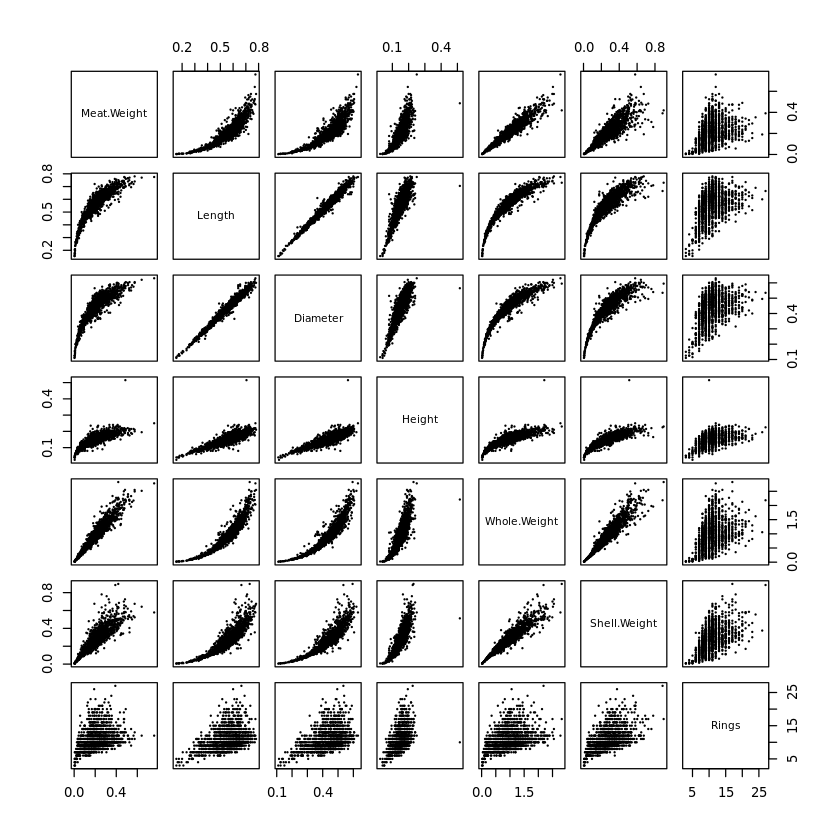

In [3]:
pairs(Meat.Weight~.,data=EX3.ABALONE,pch=20,cex=0.3)

# Support Vector Machines for Numerical Prediction

Support vector machines use the "kernel" trick to project the original data into a higher-dimensional data space.  It accomplishes this feat by implicitly creating new variables via an equation that gives components of the kernel matrix (something like a distance matrix, which is the only quantity needed to determine the form of the model).  It then finds the best linear regression to fit the relationship, with the catch that the coefficients are chosen to minimize the sum of (absolute values of) errors beyond a certain threshold while trying to minimize the coefficients themselves (try to explain as much of the relationship as possible with as little information as possible). 

Choices we need to make are:

* kernel (popular choices are the linear, polynomial, and radial basis)

* cost (for making errors)

* kernel specific parameters (like the degree of the polynomial, or "sigma" parameter of a radial basis)

Let's try them all out using `caret` (and using all predictors)!  Normally, you spend a good deal of time trying out the "tuning grids", but to save time I've come up with grids that seem decent.  The process is:  try out a grid; if the "optimal" value is right at the beginning/end of one of the parameters' ranges, try extending the range a bit and repeat.

Use `fitControl <- trainControl(method="cv",number=5)` and `set.seed(474)` for all models.

Is there compelling evidence that one type of kernel is superior over another?

**Response:**  The three support vector machines seem to be equivalent or close enough.  While the radial basis kernel has the lowest estimated generalization errors, it's by a tiny amount (in comparison with 1 SD).

,C,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,1,0.03062665,0.9112985,0.02203182,0.001401563,0.01288375,0.001506798


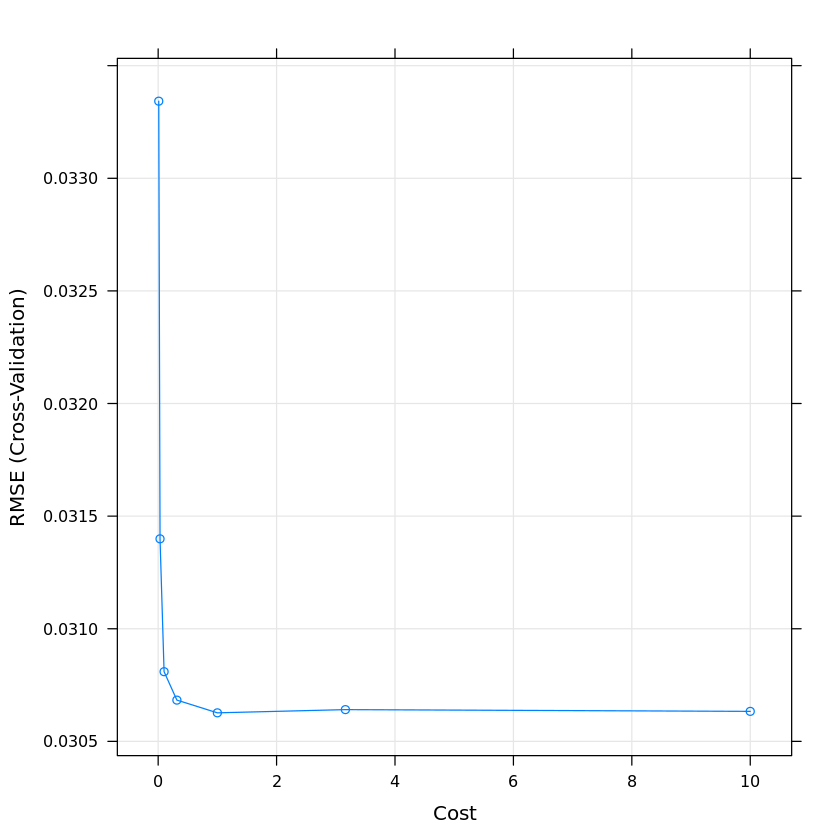

,degree,C,scale,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
71,5,10,0.001,0.03103212,0.9089237,0.02213529,0.001137206,0.01048746,0.001107341


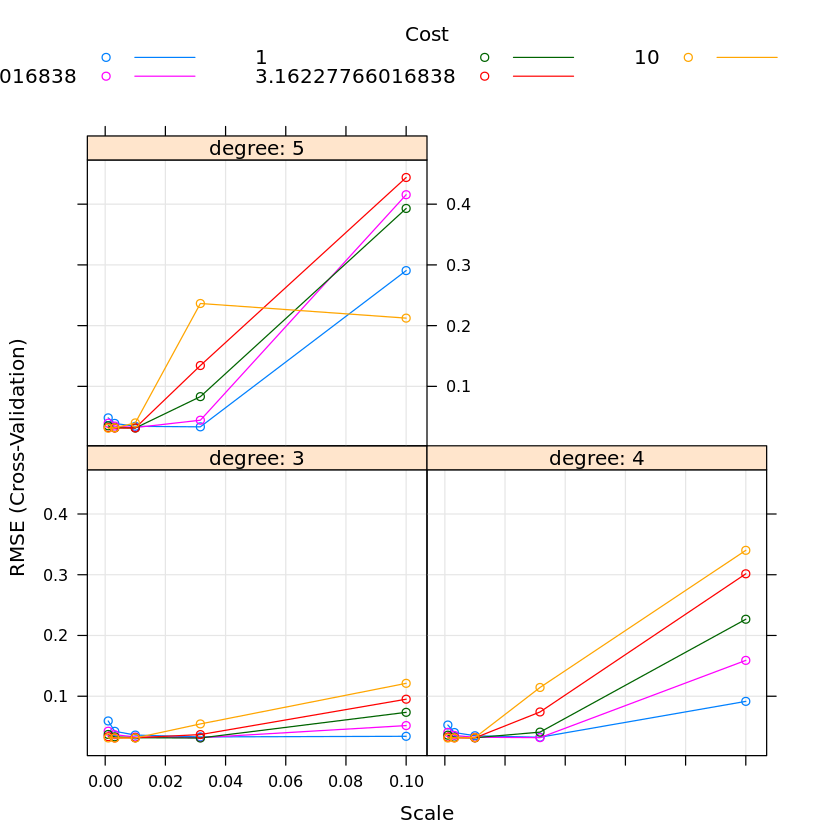

,sigma,C,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16,0.0003162278,316.2278,0.03058459,0.911559,0.02189617,0.001296601,0.0113982,0.001319633


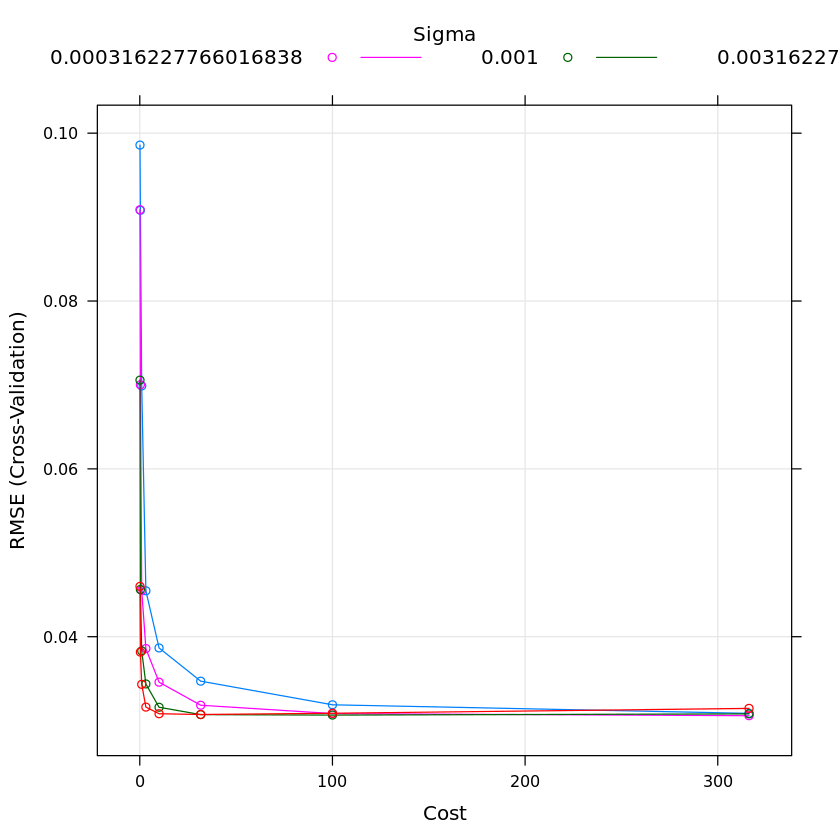

In [4]:
fitControl <- trainControl(method="cv",number=5)

svmGrid <- expand.grid(C=10^seq(-2,1,by=.5) ) 
set.seed(474); SVMlinear <- train(Meat.Weight~.,data=TRAIN, method='svmLinear', tuneGrid = svmGrid,
                                  trControl=fitControl, verbose=FALSE, preProc = c("center", "scale"))
plot(SVMlinear)
SVMlinear$results[rownames(SVMlinear$bestTune),]

svmGrid <- expand.grid(degree=3:5,C=10^seq(-1,1,by=.5),scale=10^seq(-3,-1,by=.5)) 
set.seed(474); SVMpoly <- train(Meat.Weight~.,data=TRAIN, method='svmPoly', tuneGrid = svmGrid,
                                trControl=fitControl, verbose=FALSE, preProc = c("center", "scale"))
plot(SVMpoly)
SVMpoly$results[rownames(SVMpoly$bestTune),]

svmGrid <- expand.grid(sigma=10^seq(-4,-2.5,by=.5),C=10^seq(-1,2.5,by=.5) )  
set.seed(474); SVMradial <- train(Meat.Weight~.,data=TRAIN, method='svmRadial', tuneGrid = svmGrid,
                                  trControl=fitControl, verbose=FALSE, preProc = c("center", "scale"))
plot(SVMradial)
SVMradial$results[rownames(SVMradial$bestTune),]

Using the support vector machine with radial basis kernel, make predictions on the holdout sample. Then:

* make a scatter plot between the predicted vs. actual values (if `predictions` is the output from `predict`, then `plot(HOLDOUT$Meat.Weight~predictions)` makes this nicely.
* Use `postResample` to find the error on the holdout sample
* Comment on whether the model is "overfit".

**Response:**   The model is not overfit. The error found during training is very close to that found here on holdout sample! 

RMSE   Rsquared        MAE 
0.03066659 0.91884446 0.02182888

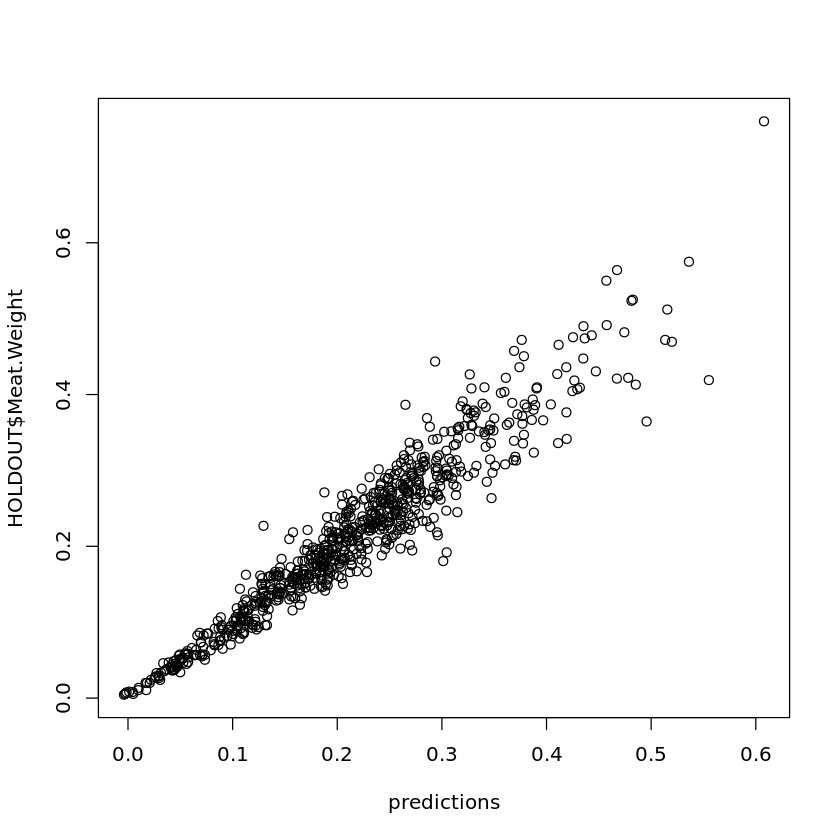

In [5]:
predictions <- predict(SVMradial,newdata=HOLDOUT)
plot(HOLDOUT$Meat.Weight~predictions)
postResample(predictions,HOLDOUT$Meat.Weight )

# Support Vector Machines for Classification

Let's try a classification problem.  We have to set up the models to be tuned on *accuracy*, because support vector machines don't naturally output probabilities unless the rest of the models (algorithms exist that come up with good "guesses" as to the probability of each class, but you have to take them with a grain of salt).

We'll use the data `WINE` but we'll forgo splitting into training/holdout.  Can we come up with a good model that predicts a wine's quality (`Quality` column) based on its chemical characteristics?

Let's try the `linear` and `radial` kernels along with some sensible tuning parameters.  For each one, use the tuning grid provided and make a `plot` of the object created by `train` so you can see just how important it is to get a "good" set of tuning parameters.  Are any kernels "better" than the others?  Do they beat a random forest?

Note:  you'll likely get some *"line search fails" warnings*; this is due to the algorithm having a difficult time finding good guesses for probabilities (which we don't need here since we are just tuning on accuracy and predicted class labels).

Use four-fold cross validation and `set.seed(474)` throughout.

**Response:**  Yes!   The linear kernel is inferior here with an estimated accuracy much lower than that of the radial basis kernel! However, the random forest does much better here.

line search fails -1.34533 -0.04130616 1.081e-05 2.491628e-06 -2.563263e-08 -2.648142e-09 -2.836869e-13

,C,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,10,0.8255556,0.6319756,0.006666667,0.01706074


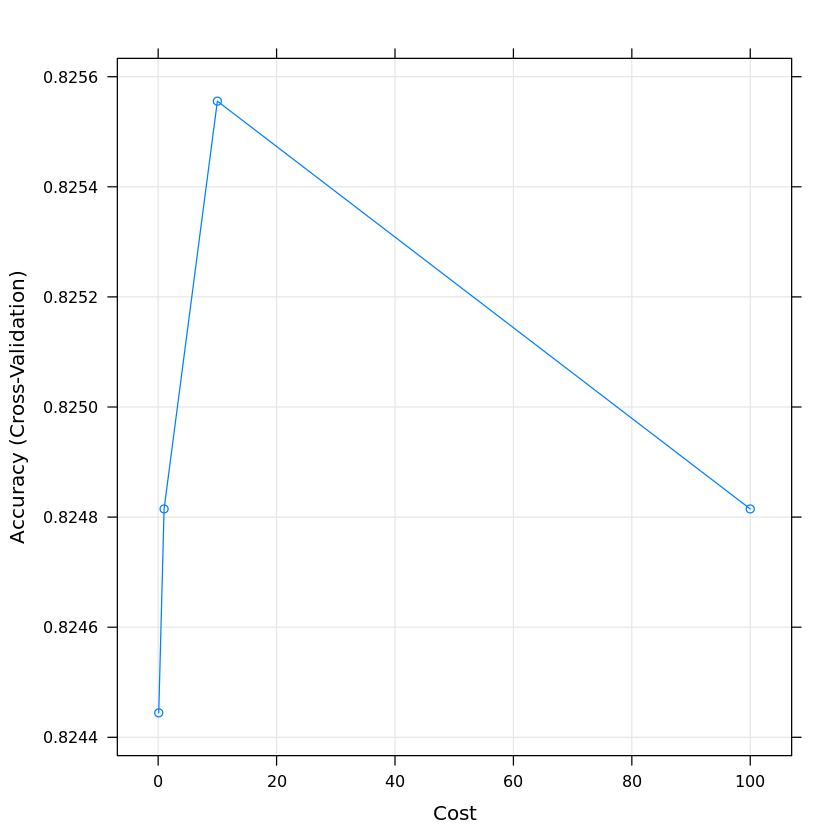

,C,sigma,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,10,0.03162278,0.8751852,0.7373444,0.007092053,0.0155836


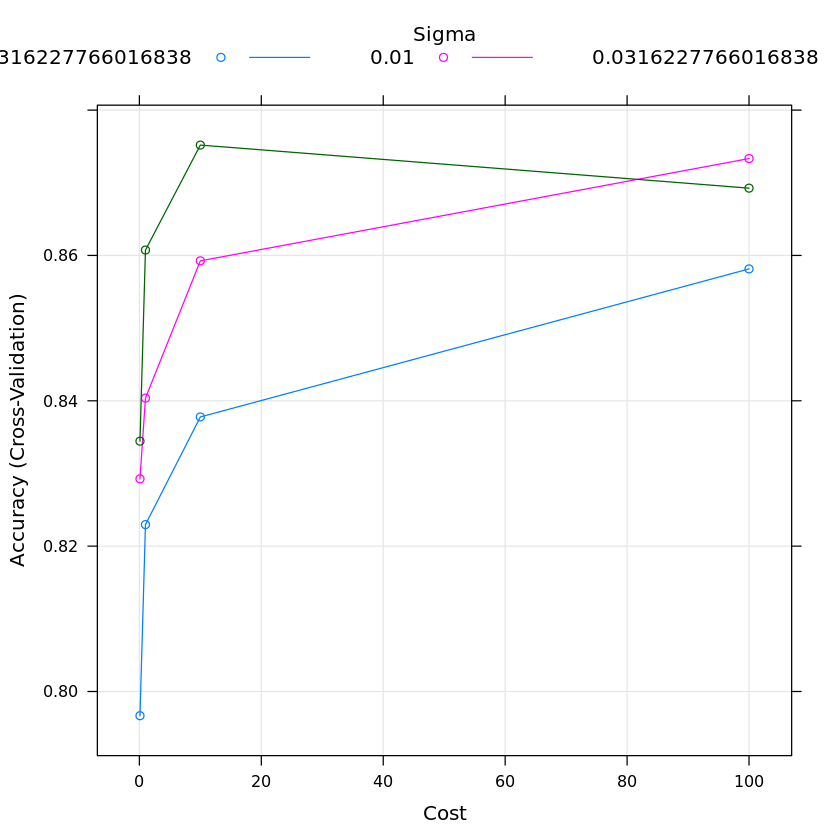

,mtry,Accuracy,Kappa,AccuracySD,KappaSD
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2,4,0.9162963,0.8241026,0.006895921,0.01508219


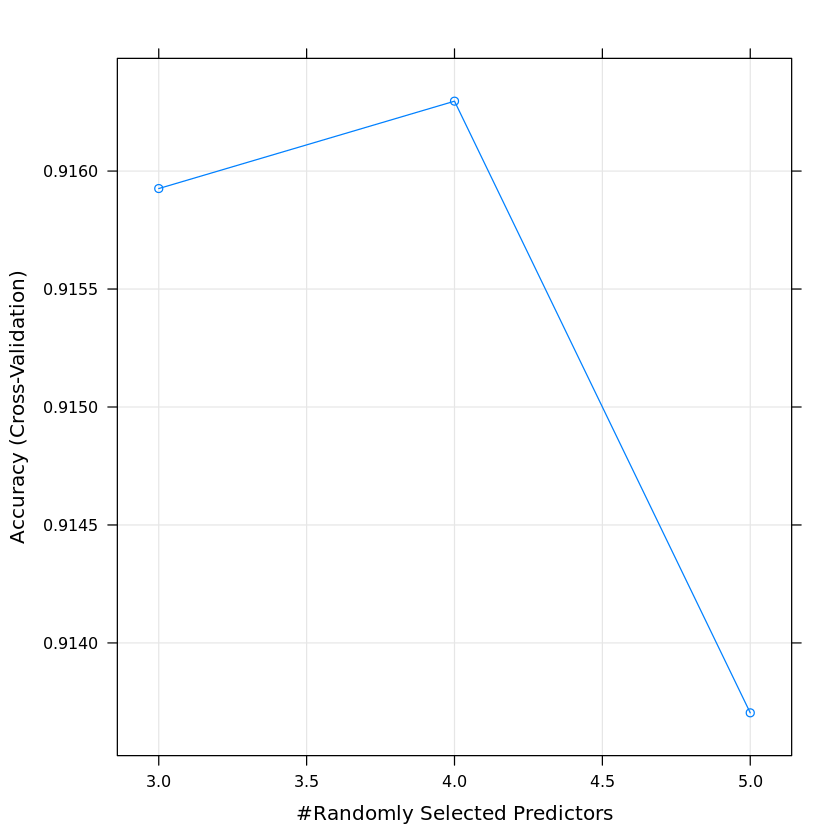

In [6]:
data(WINE, package = 'regclass')

fitControl <- trainControl(method="cv",number=4,classProbs = TRUE)

paraGrid <- expand.grid(C=10^seq(-1,2))
set.seed(474); SVMlinear <- train(Quality~.,data=WINE, method='svmLinear', tuneGrid = paraGrid,
                                  trControl=fitControl, verbose=FALSE, preProc = c("center", "scale"))
plot(SVMlinear)
SVMlinear$results[rownames(SVMlinear$bestTune),]

paraGrid <- expand.grid(C=10^seq(-1,2),sigma=10^seq(-2.5,-1.5,by=.5))
set.seed(474); SVMradial <- train(Quality~.,data=WINE, method='svmRadial', tuneGrid = paraGrid,
                                  trControl=fitControl, verbose=FALSE, preProc = c("center", "scale"))
plot(SVMradial)
SVMradial$results[rownames(SVMradial$bestTune),]

paraGrid <- expand.grid(mtry=3:5)
set.seed(474); FOREST <- train(Quality~.,data=WINE, method='rf', tuneGrid = paraGrid,
                               trControl=fitControl, verbose=FALSE, preProc = c("center", "scale"))
plot(FOREST)
FOREST$results[rownames(FOREST$bestTune),]